## Implementing Batch Gradient Descent and Stochastic Gradient Descent in Python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Python/AI&ML/gradient descent/homeprices_banglore.csv")

In [3]:
df.sample(5)

,area,bedrooms,price
3,1521,3,75.0
8,1310,3,50.0
13,1100,2,40.0
16,1180,3,48.0
2,1440,3,62.0


<b>Let's do scaling of data because 'area' is in 3-4 digits and 'price' is 2-3 digits. 'area' feature can cause impact on accuracy</b>

In [4]:
from sklearn import preprocessing

# MinMaxScaler() will bring values between 0 to 1
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

# dropping y varible i.e., 'price' from dataset
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

<b>If you don't use 'values.reshape(df.shape[0],1)', you will get a error(try to run above cell without 'values.reshape(df.shape[0],1)' for better understanding)</b>

In [6]:
np.ones(shape=(2))

array([1., 1.])

In [7]:
a = np.array([1,2,3])
b = np.array([10,8,6])
a - b

array([-9, -6, -3])

In [8]:
np.square(a-b)

array([81, 36,  9], dtype=int32)

In [9]:
np.mean(np.square(a-b))

42.0

In [10]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1] # we have 2 features
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) # initializing w1,w2 as 1 each
    b = 0 # bias = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b # w1 * area + w2 * bedrooms
        # Doing dot product of weights with 2 features.Taking transpose because
        # features are in 1 column(initially) and for dot product we need in 
        # single row multiple column form
        
        
        # equation for derivatives is:
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        # finding the difference between y_true and y_predicted then
        # taking dot product with X transpose then taking mean and
        # multiplying with -2
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        # finding the difference between y_true and y_predicted then
        # taking sum of all differences then taking mean and 
        # multiplying with -2
        
        # adjusting weights formula:
        # w1 = w1 - learning rate * d(error)/d(w1)
        # w2 = w2 - learning rate * d(error)/d(w2)
        # b = b - learning rate * d(error)/d(b)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        # printing every 10th,20th,30th iterations with cost and epoch..
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

<b>From above output w1 = 0.70712, w2 = 0.6745, bias = -0.23034, cost = 0.0068641 </b>

<b>Plotting graph of epoch vs. cost</b>

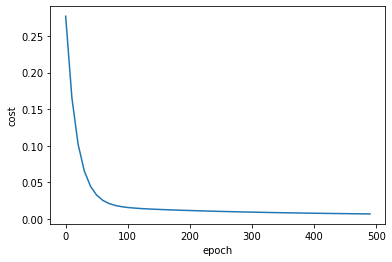

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

<b>Initially when epochs were low, cost was high and as epochs increases cost was reduced

<b>Lets do some predictions now.</b>

In [12]:
sx.transform([[2600,4]])

array([[0.62068966, 0.75      ]])

In [13]:
w

array([0.70712464, 0.67456527])

In [14]:
sy.inverse_transform([[1,0]])
# In the excel sheet(our dataset) '167' is the highest price and '32'
# is the lowest price. So inverse_transform assigned 1 to '167'
# (i.e., highest value) and 0 to '32' (lowest value) and if we add
# add '0.5' between [[1,0]] it will give intermediate values

array([[167.,  32.]])

In [15]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

<b>For area=2600 and bedrooms = 4, the price is 120 and predicted price is 128.45...its close enough</b>

In [16]:
predict(1000,2,w,b)

30.253094462442355

In [17]:
predict(1500,3,w,b)

69.47860785714694

<b>Batch GD ends here</b>

<b>Stochastic GD starts here</b>

In [21]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    number_of_features = X.shape[1]
    import random
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        # taking only 1 sample
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd
    

(array([0.70810374, 0.67550046]), -0.229663074466581, 0.0002040830579533773)

In [22]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

<b> Batch GD and Stochastic GD have same output. It has same w1, w2, bias and error values</b>

<b>Plotting Stochastic GD epoch vs cost graphs</b>

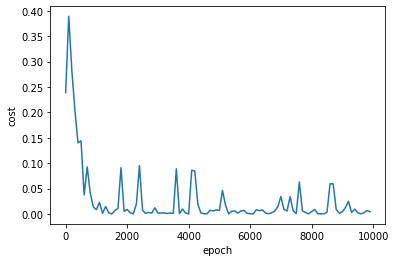

In [23]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

<b>From graph we can say that when epoch was less cost was more and gradually as epochs increased cost decreased. Stochastic GD has zig zag graph.</b>

<b>Predicting price of house in Stochastic GD</b>

In [24]:
predict(2600,4,w_sgd,b_sgd)

128.72411583418514

<b>Batch GD and Stochastic GD gave same output. For cross verification dataset can be used</b>

<b>Mini Batch GD implementation starts here</b>

In [25]:
np.random.permutation(20)

array([ 8,  0, 10, 12, 15, 14, 16,  3,  9,  7, 13, 17,  6,  2,  5, 19,  4,
        1, 11, 18])

In [26]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.7100637 , 0.67816729]), -0.23342625210382206, 0.0022899200399587095)

<b>w1= 0.71006, w2 = 0.67816, bias = -0.23342, cost = 0.0022899</b>

<b>Plotting graph for epoch vs cost</b>

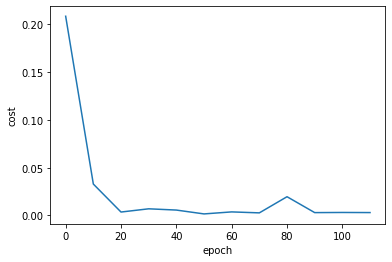

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [28]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.6503347123669

In [29]:
predict(1000,2,w,b)

29.986539801023945

In [30]:
predict(1500,3,w,b)

69.40203044637965

<b>All 3 GD models finishes here</b>